# Part 1 London’s underground resilience 

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

# Prepare the graph

In [3]:
G = nx.read_graphml('london.graph')

In [7]:
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [5]:
nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

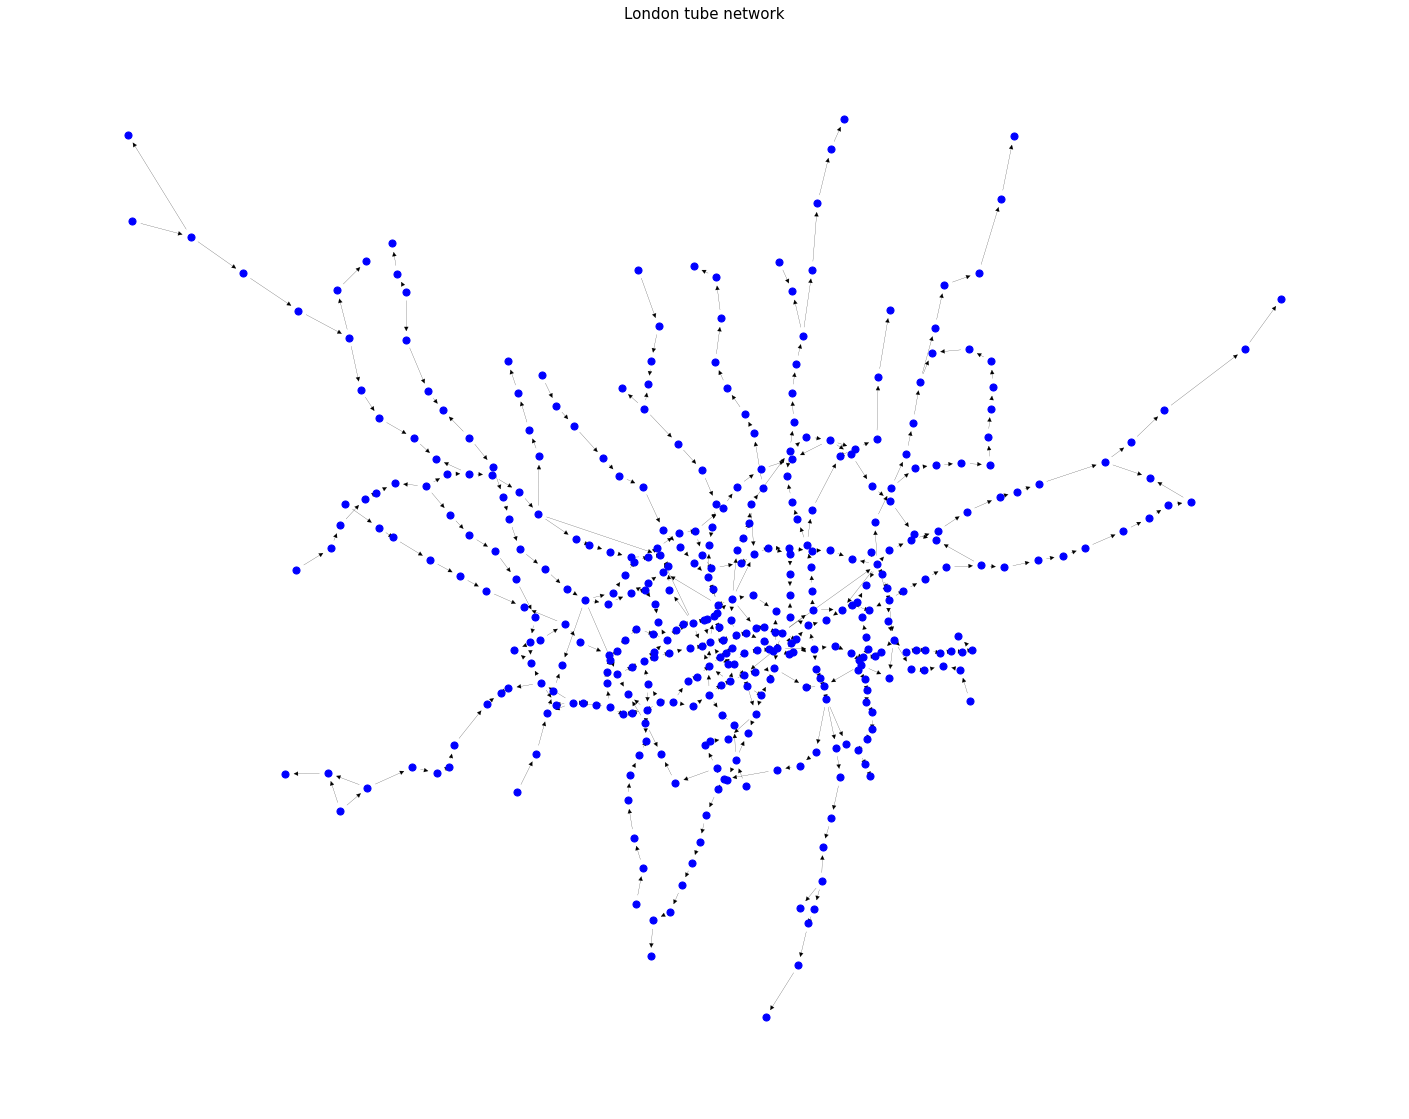

In [11]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=True,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

# Unweighted

# 1. eigenvector centrality

In [410]:
eig=nx.eigenvector_centrality_numpy(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,eig,'eigenvector')

In [412]:
# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())

df['eigenvector'] = pd.Series(nx.get_node_attributes(G, 'eigenvector'), dtype='float')

df_sorted_eig = df.sort_values(["eigenvector"], ascending=False).head(10)

In [413]:
eigrank = df_sorted_eig.index.tolist()

In [415]:
eigrank1 = df_sorted_eig
eigrank1

,eigenvector
Bank and Monument,0.383725
Liverpool Street,0.329191
Stratford,0.269574
Waterloo,0.249708
Moorgate,0.215343
Green Park,0.197023
Oxford Circus,0.183441
Tower Hill,0.171839
Westminster,0.168368
Shadwell,0.159233


In [416]:
df_sorted_eig.to_csv('eig_unw.csv')

# 1. Degree centrality

In [474]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())

df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted_deg = df.sort_values(["degree"], ascending=False).head(20)

In [475]:
degrank = df_sorted_deg.index.tolist()

In [476]:
degrank1 = df_sorted_deg
degrank1

,degree
Stratford,0.0225
Bank and Monument,0.0200
Baker Street,0.0175
King's Cross St. Pancras,0.0175
Liverpool Street,0.0150
West Ham,0.0150
Oxford Circus,0.0150
Earl's Court,0.0150
Green Park,0.0150
Waterloo,0.0150


In [332]:
degrank

['Stratford',
 'Bank and Monument',
 'Baker Street',
 "King's Cross St. Pancras",
 'Liverpool Street',
 'West Ham',
 'Oxford Circus',
 "Earl's Court",
 'Green Park',
 'Waterloo']

In [483]:
df_sorted_deg.to_csv('deg_unw_20.csv')

In [484]:
#computing the degree for each graph:
degree_G=nx.degree(G)
nx.set_node_attributes(G,dict(degree_G),'deg')
G_deg=[(i[1]['deg']) for i in G.nodes(data=True)]
    
    # find the k and p(k):
degree_valuesGdeg = sorted(set(Gdeg)) # k
probabilityGdeg = [list(G_deg).count(i)/float(nx.number_of_nodes(G)) for i in degree_valuesGdeg] #p(k)

    #Average clustering coefficient (C):
clus_deg = nx.average_clustering(G)

clus_deg   

0.03038237738985868

In [487]:
 #Number of nodes (N):
nodes_deg= G.number_of_nodes() 
    
    #Number of edges (L):
edges_deg= G.number_of_edges()
    
     #Average degree <k>:
from statistics import mean
av_deg_deg= mean(G_deg) 

In [494]:
 #compute the average shortest path length for the largest component

lar_sp=nx.average_shortest_path_length(G)

diameter = nx.diameter(G)

In [495]:
lar_sp

13.545997506234414

In [496]:
diameter

36

In [489]:
edges_deg

467

In [490]:
av_deg_deg

2.3291770573566084

## 1.1 A. non-sequential removal: 

### 1.1 A.(1) average cluster coefficient of deg

In [481]:
Gdeg=G.copy()
clus=[]
nodes=[]
edges=[]
av_deg=[]
rem=[]

for i in degrank:
    Gdeg=Gdeg.copy()
    Gdeg.remove_node(i)
    
    l1=list(G.nodes)
    len(l1)
    
    ldeg=list(Gdeg.nodes)
    len(ldeg)
    
    rem_nodes=list(set(l1) - set(ldeg))
    rem.append(rem_nodes)
    
    #computing the degree for each graph:
    degree_Gdeg=nx.degree(Gdeg)
    nx.set_node_attributes(Gdeg,dict(degree_Gdeg),'deg')
    Gdeg_deg=[(i[1]['deg']) for i in Gdeg.nodes(data=True)]
    
    # find the k and p(k):
    degree_valuesGdeg = sorted(set(Gdeg_deg)) # k
    probabilityGdeg = [list(Gdeg_deg).count(i)/float(nx.number_of_nodes(Gdeg)) for i in degree_valuesGdeg] #p(k)

    #Average clustering coefficient (C):
    clus_deg = nx.average_clustering(Gdeg)
    clus.append(clus_deg)
    
    #Number of nodes (N):
    nodes_deg= Gdeg.number_of_nodes() 
    nodes.append(nodes_deg)
    
    #Number of edges (L):
    edges_deg= Gdeg.number_of_edges()
    edges.append(edges_deg)
    
     #Average degree <k>:
    from statistics import mean
    av_deg_deg= mean(Gdeg_deg) 
    av_deg.append(av_deg_deg)
    
name=['deg1','deg2','deg3', 'deg4','deg5','deg6','deg7','deg8','deg9','deg10','deg11','deg12','deg13','deg14',
     'deg15','deg16','deg17','deg18','deg19','deg20']
df_all = pd.DataFrame({'Networks':name,'N':nodes,'<k>':av_deg,'L':edges,'C':clus,'removed':rem})
df_all

,Networks,N,<k>,L,C,removed
0,deg1,400,2.290000,458,0.030625,[Stratford]
1,deg2,399,2.255639,450,0.030027,"[Bank and Monument, Stratford]"
2,deg3,398,2.226131,443,0.027052,"[Baker Street, Bank and Monument, Stratford]"
3,deg4,397,2.196474,436,0.027288,"[Baker Street, Bank and Monument, King's Cross..."
4,deg5,396,2.181818,432,0.027357,"[Baker Street, Liverpool Street, Stratford, Ki..."
5,deg6,395,2.162025,427,0.024473,"[Baker Street, Liverpool Street, Stratford, We..."
6,deg7,394,2.137056,421,0.023012,"[Baker Street, Liverpool Street, Oxford Circus..."
7,deg8,393,2.111959,415,0.016200,"[Baker Street, Liverpool Street, Oxford Circus..."
8,deg9,392,2.091837,410,0.018367,"[Baker Street, Green Park, Liverpool Street, O..."
9,deg10,391,2.071611,405,0.016880,"[Baker Street, Green Park, Liverpool Street, O..."


In [482]:
df_all.to_csv('deg_imp_coe_20.csv')

### 1.1 A.(2) the largest component of deg

In [478]:
Gdeg=G.copy()
conne=[]
comp=[]
size=[]
largest_size=[]
lar_sp_length=[]
dia=[]
rem=[]

for i in degrank:
    Gdeg=Gdeg.copy()
    Gdeg.remove_node(i)
    
    l1=list(G.nodes)
    len(l1)
    
    ldeg=list(Gdeg.nodes)
    len(ldeg)
    
    rem_nodes=list(set(l1) - set(ldeg))
    rem.append(rem_nodes)
    
    # Has the graph one component?
    conne_deg=nx.is_connected(Gdeg)
    conne.append(conne_deg)
    
    # number of connected components
    comp_deg=nx.number_connected_components(Gdeg)
    comp.append(comp_deg)
    
    # To comput the size ( number of node) of each component
    Subg = [Gdeg.subgraph(c).copy() for c in nx.connected_components(Gdeg)]
    Subg_deg=[len(subgraph.nodes) for subgraph in Subg]
    size.append(Subg_deg)
    
    
    # To obtain the largest component as a new graph: 
    # Get the list of components:
    components = nx.connected_components(Gdeg)
    
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    
    # Create a "subgraph" of the largest component
    Largest_subgraph = (Gdeg.subgraph(largest_component)).number_of_nodes()
    largest_size.append(Largest_subgraph)
    
    #compute the average shortest path length for the largest component
    Largest_subgraph2 = Gdeg.subgraph(largest_component)
    lar_sp=nx.average_shortest_path_length(Largest_subgraph2)
    lar_sp_length.append(lar_sp)
    
    Largest_subgraph1 = Gdeg.subgraph(largest_component)
    diameter = nx.diameter(Largest_subgraph1)
    dia.append(diameter)
    
    
name=['deg1','deg2','deg3', 'deg4','deg5','deg6','deg7','deg8','deg9','deg10','deg11','deg12','deg13','deg14',
     'deg15','deg16','deg17','deg18','deg19','deg20']
df_all = pd.DataFrame({'Networks':name,'connectivity':conne,'components':comp,'size':size,'largest_size':largest_size,
                       'average_shortest_path':lar_sp_length,'diameter':dia,'removed':rem})
df_all  

,Networks,connectivity,components,size,largest_size,average_shortest_path,diameter,removed
0,deg1,False,3,"[379, 1, 20]",379,14.496447,49,[Stratford]
1,deg2,False,3,"[378, 1, 20]",378,14.872497,49,"[Bank and Monument, Stratford]"
2,deg3,False,3,"[377, 1, 20]",377,15.686438,49,"[Baker Street, Bank and Monument, Stratford]"
3,deg4,False,4,"[374, 2, 1, 20]",374,17.013376,49,"[Baker Street, Bank and Monument, King's Cross..."
4,deg5,False,5,"[368, 2, 5, 1, 20]",368,17.014512,49,"[Baker Street, Liverpool Street, Stratford, Ki..."
5,deg6,False,6,"[365, 2, 5, 2, 1, 20]",365,17.865242,53,"[Baker Street, Liverpool Street, Stratford, We..."
6,deg7,False,7,"[363, 2, 5, 1, 2, 1, 20]",363,18.025935,53,"[Baker Street, Liverpool Street, Oxford Circus..."
7,deg8,False,7,"[362, 2, 5, 1, 2, 1, 20]",362,18.383205,53,"[Baker Street, Liverpool Street, Oxford Circus..."
8,deg9,False,7,"[361, 2, 5, 1, 2, 1, 20]",361,18.518190,53,"[Baker Street, Green Park, Liverpool Street, O..."
9,deg10,False,7,"[360, 2, 5, 1, 2, 1, 20]",360,19.020396,53,"[Baker Street, Green Park, Liverpool Street, O..."


In [337]:
#Largest_subgraph = Gdeg.subgraph(largest_component)

In [338]:
#type(Largest_subgraph)

networkx.classes.graph.Graph

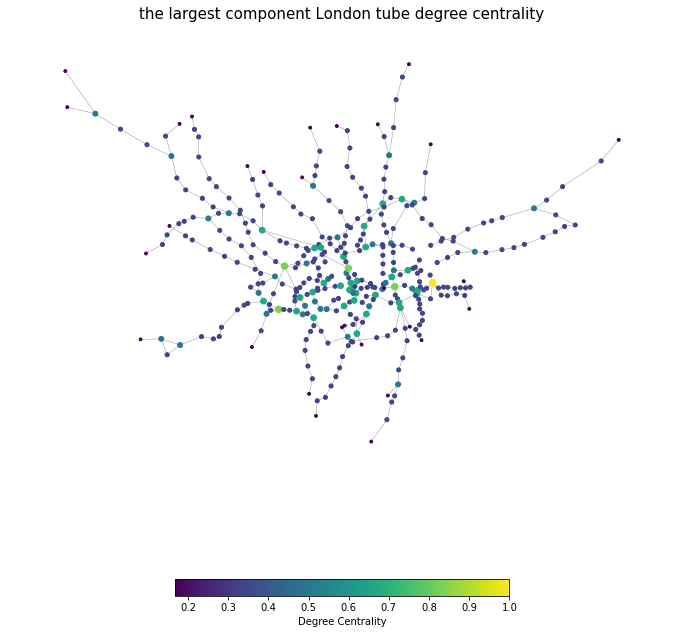

In [339]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in Largest_subgraph.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in Largest_subgraph.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in Largest_subgraph.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(Largest_subgraph, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(Largest_subgraph,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("the largest component London tube degree centrality",fontsize=15)
plt.show()

In [479]:
df_all.to_csv('deg_imp_lar_20.csv')

## 1.1 B. sequential removal

In [347]:
GdegB=G.copy()
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(GdegB)
degree=nx.set_node_attributes(GdegB,dict(deg_london),'degree')
    

# To dataframe using the nodes as the index
df = pd.DataFrame(index=GdegB.nodes())

df['degree'] = pd.Series(nx.get_node_attributes(GdegB, 'degree'))

# find the top 1 node
df_sorted_deg = df.sort_values(["degree"], ascending=False).head(1)
degtop1 = df_sorted_deg.index.tolist()

In [348]:
degtop1

['Stratford']

In [349]:
GdegB=G.copy()
degtop1list=[]
clus=[]
nodes=[]
edges=[]
av_deg=[]
conne=[]
comp=[]
size=[]
largest_size=[]
lar_sp_length=[]
dia=[]


for x in range(10): 
    for i in degtop1:
        GdegB.remove_node(i)
        GdegB=GdegB.copy()
        

    #computing the degree for each graph:
        degree_GdegB=nx.degree(GdegB)
        nx.set_node_attributes(GdegB,dict(degree_GdegB),'deg')
        GdegB_deg=[(i[1]['deg']) for i in GdegB.nodes(data=True)]
    
    # find the k and p(k):
        degree_valuesGdegB = sorted(set(GdegB_deg)) # k
        probabilityGdegB = [list(GdegB_deg).count(i)/float(nx.number_of_nodes(GdegB)) for i in degree_valuesGdegB] #p(k)

    #Average clustering coefficient (C):
        clus_deg = nx.average_clustering(GdegB)
        clus.append(clus_deg)
    
    #Number of nodes (N):
        nodes_deg= GdegB.number_of_nodes() 
        nodes.append(nodes_deg)
    
    #Number of edges (L):
        edges_deg= GdegB.number_of_edges()
        edges.append(edges_deg)
    
     #Average degree <k>:
        from statistics import mean
        av_deg_deg= mean(GdegB_deg) 
        av_deg.append(av_deg_deg)
        
        # Has the graph one component?
        conne_deg=nx.is_connected(GdegB)
        conne.append(conne_deg)
    
        # number of connected components
        comp_deg=nx.number_connected_components(GdegB)
        comp.append(comp_deg)
    
        # To comput the size ( number of node) of each component
        Subg = [GdegB.subgraph(c).copy() for c in nx.connected_components(GdegB)]
        Subg_deg=[len(subgraph.nodes) for subgraph in Subg]
        size.append(Subg_deg)
    
    
        # To obtain the largest component as a new graph: 
        # Get the list of components:
        components = nx.connected_components(GdegB)
        # Use the max() command to find the largest one:
        largest_component = max(components, key=len)
        # Create a "subgraph" of the largest component
        Largest_subgraph = (GdegB.subgraph(largest_component)).number_of_nodes()
        largest_size.append(Largest_subgraph)
        
        #compute the average shortest path length for the largest component
        Largest_subgraph2 = GdegB.subgraph(largest_component)
        lar_sp=nx.average_shortest_path_length(Largest_subgraph2)
        lar_sp_length.append(lar_sp)
    
        Largest_subgraph1 = GdegB.subgraph(largest_component)
        diameter = nx.diameter(Largest_subgraph1)
        dia.append(diameter)
        
         #  We can calculate the degree centrality using networkx function:
        deg_london =nx.degree_centrality(GdegB)
        degree=nx.set_node_attributes(GdegB,dict(deg_london),'degree')
    

     # To dataframe using the nodes as the index
        df = pd.DataFrame(index=GdegB.nodes())
        df['station_name'] = pd.Series(nx.get_node_attributes(GdegB, 'station_name'))
        df['degree'] = pd.Series(nx.get_node_attributes(GdegB, 'degree'))

        # find the top 1 node
        df_sorted_deg = df.sort_values(["degree"], ascending=False).head(1)
        degtop1 = df_sorted_deg.index.tolist()
        degtop1list.append(degtop1)

    
name=['deg1','deg2','deg3', 'deg4','deg5','deg6','deg7','deg8','deg9','deg10']
df_all = pd.DataFrame({'Networks':name,'N':nodes,'<k>':av_deg,'L':edges,'C':clus,
                       'connectivity':conne,'components':comp,'size':size,'largest_size':largest_size,
                       'average_shortest_path':lar_sp_length,'diameter':dia,'newdegtop1':degtop1list})
df_all

/tmp/ipykernel_4362/2309405091.py:86: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['station_name'] = pd.Series(nx.get_node_attributes(GdegB, 'station_name'))


,Networks,N,<k>,L,C,connectivity,components,size,largest_size,average_shortest_path,diameter,newdegtop1
0,deg1,400,2.290000,458,0.030625,False,3,"[379, 1, 20]",379,14.496447,49,[Bank and Monument]
1,deg2,399,2.255639,450,0.030027,False,3,"[378, 1, 20]",378,14.872497,49,[Baker Street]
2,deg3,398,2.226131,443,0.027052,False,3,"[377, 1, 20]",377,15.686438,49,[King's Cross St. Pancras]
3,deg4,397,2.196474,436,0.027288,False,4,"[374, 2, 1, 20]",374,17.013376,49,[Earl's Court]
4,deg5,396,2.171717,430,0.020539,False,4,"[373, 2, 1, 20]",373,17.375897,50,[Canning Town]
5,deg6,395,2.146835,424,0.017637,False,6,"[359, 2, 8, 1, 5, 20]",359,17.727642,50,[Oxford Circus]
6,deg7,394,2.121827,418,0.016159,False,7,"[357, 2, 1, 8, 1, 5, 20]",357,17.897004,51,[Turnham Green]
7,deg8,393,2.101781,413,0.012977,False,7,"[356, 2, 1, 8, 1, 5, 20]",356,18.315778,53,[Green Park]
8,deg9,392,2.081633,408,0.015136,False,7,"[355, 2, 1, 8, 1, 5, 20]",355,18.468704,53,[Waterloo]
9,deg10,391,2.061381,403,0.013640,False,7,"[354, 2, 1, 8, 1, 5, 20]",354,19.015781,53,[Willesden Junction]


In [350]:
df_all.to_csv('deg_imp_B2.csv')

# 2. Topological betweenness centrality

In [8]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

In [530]:
Gbet=G.copy()
clus=[]
nodes=[]
edges=[]
av_deg=[]

#computing the degree for each graph:
degree_Gbet=nx.degree(Gbet)
nx.set_node_attributes(Gbet,dict(degree_Gbet),'deg')
Gbet_deg=[(i[1]['deg']) for i in Gbet.nodes(data=True)]
    
# find the k and p(k):
degree_valuesGbet = sorted(set(Gbet_deg)) # k
probabilityGbet = [list(Gbet_deg).count(i)/float(nx.number_of_nodes(Gbet)) for i in degree_valuesGbet] #p(k)

#Average clustering coefficient (C):
clus_bet = nx.average_clustering(Gbet)
clus.append(clus_bet)
    
    #Number of nodes (N):
nodes_bet= Gbet.number_of_nodes() 
nodes.append(nodes_bet)
    
    #Number of edges (L):
edges_bet= Gbet.number_of_edges()
edges.append(edges_bet)
    
     #Average degree <k>:
from statistics import mean
av_deg_bet= mean(Gbet_deg) 
av_deg.append(av_deg_bet)
    
name=['bet0']
df_all = pd.DataFrame({'Networks':name,'N':nodes,'<k>':av_deg,'L':edges,'C':clus})
df_all

,Networks,N,<k>,L,C
0,bet0,401,2.329177,467,0.030382


In [9]:
# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())

df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'), dtype='float')

df_sorted_bet = df.sort_values(["betweenness_t"], ascending=False).head(10)

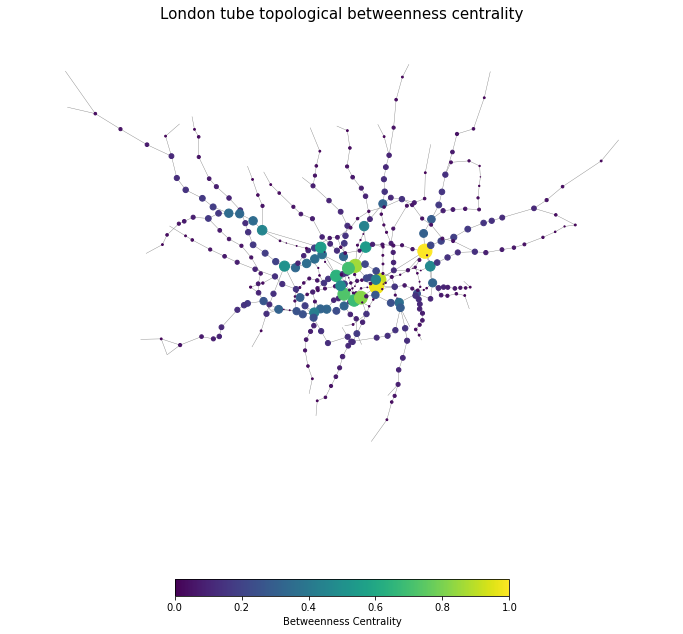

<Figure size 432x288 with 0 Axes>

In [13]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*200 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

plt.savefig('between.png')

In [359]:
betrank = df_sorted_bet.index.tolist()

In [379]:
df_sorted_bet.to_csv('bet_unw.csv')

In [360]:
betrank

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

In [265]:
#Let us compute the betweenness centrality for the network, but this time lets do it in the edges!
bet_london_e=nx.edge_betweenness_centrality(G)
# We can add these values to the edges attributes:
nx.set_edge_attributes(G,bet_london_e,'betweenness_e')

In [267]:
df = pd.DataFrame(index=G.edges())

df['length'] = pd.Series(nx.get_edge_attributes(G, 'length'))
df['betweenness_e'] = pd.Series(nx.get_edge_attributes(G, 'betweenness_e'),dtype='float')

df_sorted = df.sort_values(["betweenness_e"], ascending=False)
df_sorted[0:10]

length  betweenness_e
Liverpool Street         Stratford             6698.461270       0.240512
Bank and Monument        Waterloo              2542.954444       0.210696
Westminster              Waterloo               850.360026       0.196594
Liverpool Street         Bank and Monument      841.502684       0.179763
Westminster              Green Park            1423.780195       0.176841
King's Cross St. Pancras Euston                 888.358727       0.159938
                         Highbury & Islington  2581.853010       0.149640
Baker Street             Finchley Road         3534.637247       0.145825
Wembley Park             Finchley Road         7266.373927       0.136257
Stratford                West Ham              1673.509515       0.128585

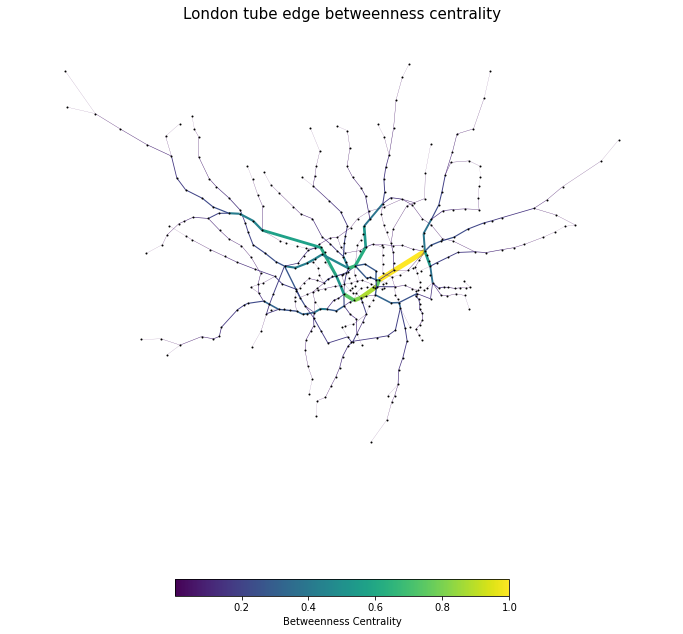

In [268]:
# Lets set color and width of edges according to betweenness values
betweenness_e_values=[(i[2]['betweenness_e']) for i in G.edges(data=True)]

bet_e_color=[(i[2]['betweenness_e']/max(betweenness_e_values)) for i in G.edges(data=True)]
bet_e_width=[(i[2]['betweenness_e']/max(betweenness_e_values)*5) for i in G.edges(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

#pos=nx.spring_layout(X)
edg=nx.draw_networkx_edges(G, pos,edge_color=bet_e_color, width=bet_e_width)

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube edge betweenness centrality",fontsize=15)
plt.show()

## 2.1 A. non-sequential removal

### 2.1 A.(1) average cluster coefficient of bet

In [355]:
Gbet=G.copy()
clus=[]
nodes=[]
edges=[]
av_deg=[]
rem=[]

for i in betrank:
    Gbet=Gbet.copy()
    Gbet.remove_node(i)
    
    l1=list(G.nodes)
    len(l1)
    
    lbet=list(Gbet.nodes)
    len(lbet)
    
    rem_nodes=list(set(l1) - set(lbet))
    rem.append(rem_nodes)
    
    #computing the degree for each graph:
    degree_Gbet=nx.degree(Gbet)
    nx.set_node_attributes(Gbet,dict(degree_Gbet),'deg')
    Gbet_deg=[(i[1]['deg']) for i in Gbet.nodes(data=True)]
    
    # find the k and p(k):
    degree_valuesGbet = sorted(set(Gbet_deg)) # k
    probabilityGbet = [list(Gbet_deg).count(i)/float(nx.number_of_nodes(Gbet)) for i in degree_valuesGbet] #p(k)

    #Average clustering coefficient (C):
    clus_bet = nx.average_clustering(Gbet)
    clus.append(clus_bet)
    
    #Number of nodes (N):
    nodes_bet= Gbet.number_of_nodes() 
    nodes.append(nodes_bet)
    
    #Number of edges (L):
    edges_bet= Gbet.number_of_edges()
    edges.append(edges_bet)
    
     #Average degree <k>:
    from statistics import mean
    av_deg_bet= mean(Gbet_deg) 
    av_deg.append(av_deg_bet)
    
name=['bet1','bet2','bet3', 'bet4','bet5','bet6','bet7','bet8','bet9','bet10']
df_all = pd.DataFrame({'Networks':name,'N':nodes,'<k>':av_deg,'L':edges,'C':clus,'removed':rem})
df_all

,Networks,N,<k>,L,C,removed
0,bet1,400,2.290000,458,0.030625,[Stratford]
1,bet2,399,2.255639,450,0.030027,"[Bank and Monument, Stratford]"
2,bet3,398,2.241206,446,0.030103,"[Bank and Monument, Liverpool Street, Stratford]"
3,bet4,397,2.211587,439,0.030347,"[Bank and Monument, King's Cross St. Pancras, ..."
4,bet5,396,2.191919,434,0.029329,"[Liverpool Street, Stratford, Waterloo, King's..."
5,bet6,395,2.167089,428,0.028306,"[Green Park, Liverpool Street, Stratford, Wate..."
6,bet7,394,2.152284,424,0.024994,"[Euston, Green Park, Liverpool Street, Stratfo..."
7,bet8,393,2.147583,422,0.025058,"[Euston, Green Park, Liverpool Street, Westmin..."
8,bet9,392,2.117347,415,0.021599,"[Baker Street, Euston, Green Park, Liverpool S..."
9,bet10,391,2.107417,412,0.021654,"[Baker Street, King's Cross St. Pancras, Eusto..."


In [356]:
df_all.to_csv('bet_imp_coe.csv')

In [532]:
Gbet=G.copy()
conne=[]
comp=[]
size=[]
largest_size=[]
lar_sp_length=[]
dia=[]


    # Has the graph one component?
conne_bet=nx.is_connected(Gbet)
conne.append(conne_bet)
    
    # number of connected components
comp_bet=nx.number_connected_components(Gbet)
comp.append(comp_bet)
    
    # To comput the size ( number of node) of each component
Subg = [Gbet.subgraph(c).copy() for c in nx.connected_components(Gbet)]
Subg_bet=[len(subgraph.nodes) for subgraph in Subg]
size.append(Subg_bet)
    
    
    # To obtain the largest component as a new graph: 
    # Get the list of components:
components = nx.connected_components(Gbet)
    # Use the max() command to find the largest one:
largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
Largest_subgraph = (Gbet.subgraph(largest_component)).number_of_nodes()
largest_size.append(Largest_subgraph)
    
    #compute the average shortest path length for the largest component
Largest_subgraph2 = Gbet.subgraph(largest_component)
lar_sp=nx.average_shortest_path_length(Largest_subgraph2)
lar_sp_length.append(lar_sp)
    
Largest_subgraph1 = Gbet.subgraph(largest_component)
diameter = nx.diameter(Largest_subgraph1)
dia.append(diameter)
    
    
name=['bet0']
df_all = pd.DataFrame({'Networks':name,'connectivity':conne,'components':comp,'size':size,'largest_size':largest_size,
                       'average_shortest_path':lar_sp_length,'diameter':dia})
df_all  

,Networks,connectivity,components,size,largest_size,average_shortest_path,diameter
0,bet0,True,1,[401],401,13.545998,36


### 2.1 A.(2) the largest component of bet

In [361]:
Gbet=G.copy()
conne=[]
comp=[]
size=[]
largest_size=[]
lar_sp_length=[]
dia=[]
rem=[]

for i in betrank:
    Gbet=Gbet.copy()
    Gbet.remove_node(i)
    
    l1=list(G.nodes)
    len(l1)
    
    lbet=list(Gbet.nodes)
    len(lbet)
    
    rem_nodes=list(set(l1) - set(lbet))
    rem.append(rem_nodes)
    
    # Has the graph one component?
    conne_bet=nx.is_connected(Gbet)
    conne.append(conne_bet)
    
    # number of connected components
    comp_bet=nx.number_connected_components(Gbet)
    comp.append(comp_bet)
    
    # To comput the size ( number of node) of each component
    Subg = [Gbet.subgraph(c).copy() for c in nx.connected_components(Gbet)]
    Subg_bet=[len(subgraph.nodes) for subgraph in Subg]
    size.append(Subg_bet)
    
    
    # To obtain the largest component as a new graph: 
    # Get the list of components:
    components = nx.connected_components(Gbet)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph = (Gbet.subgraph(largest_component)).number_of_nodes()
    largest_size.append(Largest_subgraph)
    
    #compute the average shortest path length for the largest component
    Largest_subgraph2 = Gbet.subgraph(largest_component)
    lar_sp=nx.average_shortest_path_length(Largest_subgraph2)
    lar_sp_length.append(lar_sp)
    
    Largest_subgraph1 = Gbet.subgraph(largest_component)
    diameter = nx.diameter(Largest_subgraph1)
    dia.append(diameter)
    
    
name=['bet1','bet2','bet3', 'bet4','bet5','bet6','bet7','bet8','bet9','bet10']
df_all = pd.DataFrame({'Networks':name,'connectivity':conne,'components':comp,'size':size,'largest_size':largest_size,
                       'average_shortest_path':lar_sp_length,'diameter':dia,'removed':rem})
df_all  

,Networks,connectivity,components,size,largest_size,average_shortest_path,diameter,removed
0,bet1,False,3,"[379, 1, 20]",379,14.496447,49,[Stratford]
1,bet2,False,3,"[378, 1, 20]",378,14.872497,49,"[Bank and Monument, Stratford]"
2,bet3,False,3,"[377, 1, 20]",377,15.031209,49,"[Bank and Monument, Liverpool Street, Stratford]"
3,bet4,False,4,"[371, 5, 1, 20]",371,16.030742,49,"[Bank and Monument, King's Cross St. Pancras, ..."
4,bet5,False,4,"[370, 5, 1, 20]",370,16.756742,49,"[Liverpool Street, Stratford, Waterloo, King's..."
5,bet6,False,4,"[369, 5, 1, 20]",369,17.180865,49,"[Green Park, Liverpool Street, Stratford, Wate..."
6,bet7,False,5,"[346, 5, 1, 20, 22]",346,16.807372,49,"[Euston, Green Park, Liverpool Street, Stratfo..."
7,bet8,False,5,"[345, 5, 1, 20, 22]",345,16.975059,49,"[Euston, Green Park, Liverpool Street, Westmin..."
8,bet9,False,6,"[342, 2, 5, 1, 20, 22]",342,17.586339,49,"[Baker Street, Euston, Green Park, Liverpool S..."
9,bet10,False,7,"[339, 2, 5, 1, 20, 22, 2]",339,17.986979,49,"[Baker Street, King's Cross St. Pancras, Eusto..."


In [362]:
df_all.to_csv('bet_imp_lar.csv')

## 2.1 B.sequential removal

In [363]:
GbetB=G.copy()
#  We can calculate the degree centrality using networkx function:
bet_london_t =nx.betweenness_centrality(GbetB, normalized=False)
betweenness=nx.set_node_attributes(GbetB,bet_london_t,'betweenness_t')
    

# To dataframe using the nodes as the index
df = pd.DataFrame(index=GbetB.nodes())

df['betweenness_t'] = pd.Series(nx.get_node_attributes(GbetB, 'betweenness_t'), dtype='float')

# find the top 1 node
df_sorted_bet = df.sort_values(["betweenness_t"], ascending=False).head(1)
bettop1 = df_sorted_bet.index.tolist()

In [364]:
bettop1

['Stratford']

In [365]:
GbetB=G.copy()
bettop1list=[]
betweenness=[]
clus=[]
nodes=[]
edges=[]
av_deg=[]
conne=[]
comp=[]
size=[]
lar_sp_length=[]
largest_size=[]
dia=[]

for x in range(10): 
    for i in bettop1:
        GbetB.remove_node(i)
        GbetB=GbetB.copy()
        
         #computing the degree for each graph:
        degree_GbetB=nx.degree(GbetB)
        nx.set_node_attributes(GbetB,dict(degree_GbetB),'deg')
        GbetB_deg=[(i[1]['deg']) for i in GbetB.nodes(data=True)]
    
    # find the k and p(k):
        degree_valuesGbetB = sorted(set(GbetB_deg)) # k
        probabilityGbetB = [list(GbetB_deg).count(i)/float(nx.number_of_nodes(GbetB)) for i in degree_valuesGbetB] #p(k)

    #Average clustering coefficient (C):
        clus_bet = nx.average_clustering(GbetB)
        clus.append(clus_bet)
    
    #Number of nodes (N):
        nodes_bet= GbetB.number_of_nodes() 
        nodes.append(nodes_bet)
    
    #Number of edges (L):
        edges_bet= GbetB.number_of_edges()
        edges.append(edges_bet)
    
     #Average degree <k>:
        from statistics import mean
        av_deg_bet= mean(GbetB_deg) 
        av_deg.append(av_deg_bet)
        
        # Has the graph one component?
        conne_bet=nx.is_connected(GbetB)
        conne.append(conne_bet)
    
        # number of connected components
        comp_bet=nx.number_connected_components(GbetB)
        comp.append(comp_bet)
    
        # To comput the size ( number of node) of each component
        Subg = [GbetB.subgraph(c).copy() for c in nx.connected_components(GbetB)]
        Subg_bet=[len(subgraph.nodes) for subgraph in Subg]
        size.append(Subg_bet)
    
    
        # To obtain the largest component as a new graph: 
        # Get the list of components:
        components = nx.connected_components(GbetB)
        # Use the max() command to find the largest one:
        largest_component = max(components, key=len)
        # Create a "subgraph" of the largest component
        Largest_subgraph = (GbetB.subgraph(largest_component)).number_of_nodes()
        largest_size.append(Largest_subgraph)
        
        #compute the average shortest path length for the largest component
        Largest_subgraph2 = GbetB.subgraph(largest_component)
        lar_sp=nx.average_shortest_path_length(Largest_subgraph2)
        lar_sp_length.append(lar_sp)
    
        Largest_subgraph1 = GbetB.subgraph(largest_component)
        diameter = nx.diameter(Largest_subgraph1)
        dia.append(diameter)
        
        
                
    #  We can calculate the degree centrality using networkx function:
        bet_london_t =nx.betweenness_centrality(GbetB, normalized=False)
        betweenness=nx.set_node_attributes(GbetB,bet_london_t,'betweenness_t')
    

     # To dataframe using the nodes as the index
        df = pd.DataFrame(index=GbetB.nodes())
        df['station_name'] = pd.Series(nx.get_node_attributes(GbetB, 'station_name'))
        df['betweenness_t'] = pd.Series(nx.get_node_attributes(GbetB, 'betweenness_t'), dtype='float')

        # find the top 1 node
        df_sorted_bet = df.sort_values(["betweenness_t"], ascending=False).head(1)
        bettop1 = df_sorted_bet.index.tolist()
        bettop1list.append(bettop1)   
    
   
    


    
name=['bet1','bet2','bet3', 'bet4','bet5','bet6','bet7','bet8','bet9','bet10']
df_all = pd.DataFrame({'Networks':name,'N':nodes,'<k>':av_deg,'L':edges,'C':clus,
                       'connectivity':conne,'components':comp,'size':size,'largest_size':largest_size,
                       'average_shortest_path':lar_sp_length,'diameter':dia,'newbettop1':bettop1list})
df_all

/tmp/ipykernel_4362/1830218536.py:87: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['station_name'] = pd.Series(nx.get_node_attributes(GbetB, 'station_name'))


,Networks,N,<k>,L,C,connectivity,components,size,largest_size,average_shortest_path,diameter,newbettop1
0,bet1,400,2.290000,458,0.030625,False,3,"[379, 1, 20]",379,14.496447,49,[King's Cross St. Pancras]
1,bet2,399,2.260652,451,0.030869,False,3,"[378, 1, 20]",378,15.310134,49,[Waterloo]
2,bet3,398,2.236181,445,0.029971,False,3,"[377, 1, 20]",377,15.795939,49,[Bank and Monument]
3,bet4,397,2.206549,438,0.029255,False,3,"[376, 1, 20]",376,16.789631,49,[Canada Water]
4,bet5,396,2.191919,434,0.029329,False,3,"[375, 1, 20]",375,19.029234,55,[West Hampstead]
5,bet6,395,2.177215,430,0.029403,False,4,"[147, 227, 1, 20]",227,13.462360,38,[Earl's Court]
6,bet7,394,2.152284,424,0.022625,False,4,"[147, 226, 1, 20]",226,14.206450,39,[Shepherd's Bush]
7,bet8,393,2.137405,420,0.022683,False,5,"[147, 196, 1, 20, 29]",196,13.792046,37,[Euston]
8,bet9,392,2.122449,416,0.019339,False,6,"[147, 173, 1, 20, 22, 29]",173,13.821885,38,[Baker Street]
9,bet10,391,2.092072,409,0.016283,False,7,"[147, 170, 2, 1, 20, 22, 29]",170,18.193596,48,[Acton Town]


In [366]:
df_all.to_csv('bet_imp_B.csv')

# 3. Topological closeness centrality

In [367]:
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())

df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted_clo = df.sort_values(["closeness_t"], ascending=False).head(10)
df_sorted_clo

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Angel,0.110742
Farringdon,0.110742
Moorgate,0.110314


In [369]:
clorank = df_sorted_clo.index.tolist()

In [368]:
df_sorted_clo.to_csv('clo_unw.csv')

In [370]:
clorank

['Green Park',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Westminster',
 'Waterloo',
 'Oxford Circus',
 'Bond Street',
 'Angel',
 'Farringdon',
 'Moorgate']

## 3.1 A. non-sequential removal

### 3.1 A.(1) average cluster coefficient of clo

In [221]:
Gclo=G.copy()
clus=[]
nodes=[]
edges=[]
av_deg=[]
rem=[]

for i in clorank:
    Gclo=Gclo.copy()
    Gclo.remove_node(i)
    
    l1=list(G.nodes)
    len(l1)
    
    lclo=list(Gclo.nodes)
    len(lclo)
    
    rem_nodes=list(set(l1) - set(lclo))
    rem.append(rem_nodes)
    
    #computing the degree for each graph:
    degree_Gclo=nx.degree(Gclo)
    nx.set_node_attributes(Gclo,dict(degree_Gclo),'deg')
    Gclo_deg=[(i[1]['deg']) for i in Gclo.nodes(data=True)]
    
    # find the k and p(k):
    degree_valuesGclo = sorted(set(Gclo_deg)) # k
    probabilityGclo = [list(Gclo_deg).count(i)/float(nx.number_of_nodes(Gclo)) for i in degree_valuesGclo] #p(k)

    #Average clustering coefficient (C):
    clus_clo = nx.average_clustering(Gclo)
    clus.append(clus_clo)
    
    #Number of nodes (N):
    nodes_clo= Gclo.number_of_nodes() 
    nodes.append(nodes_clo)
    
    #Number of edges (L):
    edges_clo= Gclo.number_of_edges()
    edges.append(edges_clo)
    
     #Average degree <k>:
    from statistics import mean
    av_deg_clo= mean(Gclo_deg) 
    av_deg.append(av_deg_clo)
    
name=['clo1','clo2','clo3', 'clo4','clo5','clo6','clo7','clo8','clo9','clo10']
    

df_all = pd.DataFrame({'Networks':name,'N':nodes,'<k>':av_deg,'L':edges,'C':clus,'removed':rem})
df_all

,Networks,N,<k>,L,C,removed
0,clo1,400,2.305000,461,0.029792,[Green Park]
1,clo2,399,2.270677,453,0.029276,"[Green Park, Bank and Monument]"
2,clo3,398,2.241206,446,0.029517,"[Green Park, King's Cross St. Pancras, Bank an..."
3,clo4,397,2.231738,443,0.028080,"[Green Park, King's Cross St. Pancras, Westmin..."
4,clo5,396,2.217172,439,0.028151,"[Green Park, Westminster, Waterloo, King's Cro..."
5,clo6,395,2.197468,434,0.029910,"[Green Park, Oxford Circus, Westminster, Water..."
6,clo7,394,2.192893,432,0.030034,"[Green Park, Oxford Circus, Westminster, Bond ..."
7,clo8,393,2.193384,431,0.030110,"[King's Cross St. Pancras, Green Park, Oxford ..."
8,clo9,392,2.193878,430,0.030187,"[King's Cross St. Pancras, Green Park, Oxford ..."
9,clo10,391,2.184143,427,0.030264,"[King's Cross St. Pancras, Moorgate, Green Par..."


In [222]:
df_all.to_csv('clo_imp_coe.csv')

### 3.1 A.(2) the largest component of clo

In [371]:
Gclo=G.copy()
conne=[]
comp=[]
size=[]
largest_size=[]
lar_sp_length=[]
dia=[]
rem=[]

for i in clorank:
    Gclo=Gclo.copy()
    Gclo.remove_node(i)
    
    l1=list(G.nodes)
    len(l1)
    
    lclo=list(Gclo.nodes)
    len(lclo)
    
    rem_nodes=list(set(l1) - set(lclo))
    rem.append(rem_nodes)
    
    # Has the graph one component?
    conne_clo=nx.is_connected(Gclo)
    conne.append(conne_clo)
    
    # number of connected components
    comp_clo=nx.number_connected_components(Gclo)
    comp.append(comp_clo)
    
    # To comput the size ( number of node) of each component
    Subg = [Gclo.subgraph(c).copy() for c in nx.connected_components(Gclo)]
    Subg_clo=[len(subgraph.nodes) for subgraph in Subg]
    size.append(Subg_clo)
    
    
    # To obtain the largest component as a new graph: 
    # Get the list of components:
    components = nx.connected_components(Gclo)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    # Create a "subgraph" of the largest component
    Largest_subgraph = (Gclo.subgraph(largest_component)).number_of_nodes()
    largest_size.append(Largest_subgraph)
    
    #compute the average shortest path length for the largest component
    Largest_subgraph2 = Gclo.subgraph(largest_component)
    lar_sp=nx.average_shortest_path_length(Largest_subgraph2)
    lar_sp_length.append(lar_sp)
    
    Largest_subgraph1 = Gclo.subgraph(largest_component)
    diameter = nx.diameter(Largest_subgraph1)
    dia.append(diameter)
    
    
name=['clo1','clo2','clo3', 'clo4','clo5','clo6','clo7','clo8','clo9','clo10']
df_all = pd.DataFrame({'Networks':name,'connectivity':conne,'components':comp,'size':size,'largest_size':largest_size,
                       'average_shortest_path':lar_sp_length,'diameter':dia,'removed':rem})
df_all  

,Networks,connectivity,components,size,largest_size,average_shortest_path,diameter,removed
0,clo1,True,1,[400],400,13.824536,36,[Green Park]
1,clo2,True,1,[399],399,14.382728,38,"[Green Park, Bank and Monument]"
2,clo3,True,1,[398],398,15.983773,42,"[Green Park, King's Cross St. Pancras, Bank an..."
3,clo4,True,1,[397],397,16.080248,42,"[Green Park, King's Cross St. Pancras, Westmin..."
4,clo5,True,1,[396],396,16.855722,42,"[Green Park, Westminster, Waterloo, King's Cro..."
5,clo6,True,1,[395],395,17.431832,45,"[Green Park, Oxford Circus, Westminster, Water..."
6,clo7,True,1,[394],394,17.464267,45,"[Green Park, Oxford Circus, Westminster, Bond ..."
7,clo8,True,1,[393],393,17.462494,45,"[King's Cross St. Pancras, Green Park, Oxford ..."
8,clo9,True,1,[392],392,17.460528,45,"[King's Cross St. Pancras, Green Park, Oxford ..."
9,clo10,False,3,"[389, 1, 1]",389,17.473922,45,"[King's Cross St. Pancras, Moorgate, Green Par..."


In [372]:
df_all.to_csv('clo_imp_lar.csv')

## 3.1 B. sequential removal

In [373]:
GcloB=G.copy()
clos_t=nx.closeness_centrality(GcloB)
# We can add these values to the nodes attributes:
nx.set_node_attributes(GcloB,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GcloB.nodes())

df['closeness_t'] = pd.Series(nx.get_node_attributes(GcloB, 'closeness_t'))

df_sorted_clo = df.sort_values(["closeness_t"], ascending=False).head(1)
clotop1 = df_sorted_clo.index.tolist()

In [374]:
clotop1

['Green Park']

In [375]:
GcloB=G.copy()
clotop1list=[]
clus=[]
nodes=[]
edges=[]
av_deg=[]
conne=[]
comp=[]
size=[]
lar_sp_length=[]
largest_size=[]
dia=[]
for x in range(10): 
    for i in clotop1:
        GcloB.remove_node(i)
        GcloB=GcloB.copy()
        
         #computing the degree for each graph:
        degree_GcloB=nx.degree(GcloB)
        nx.set_node_attributes(GcloB,dict(degree_GcloB),'deg')
        GcloB_deg=[(i[1]['deg']) for i in GcloB.nodes(data=True)]
        
         # find the k and p(k):
        degree_valuesGcloB = sorted(set(GcloB_deg)) # k
        probabilityGcloB = [list(GcloB_deg).count(i)/float(nx.number_of_nodes(GcloB)) for i in degree_valuesGcloB] #p(k)

    #Average clustering coefficient (C):
        clus_clo = nx.average_clustering(GcloB)
        clus.append(clus_clo)
    
    #Number of nodes (N):
        nodes_clo= GcloB.number_of_nodes() 
        nodes.append(nodes_clo)
    
    #Number of edges (L):
        edges_clo= GcloB.number_of_edges()
        edges.append(edges_clo)
    
     #Average degree <k>:
        from statistics import mean
        av_deg_clo= mean(GcloB_deg) 
        av_deg.append(av_deg_clo)
        
        # Has the graph one component?
        conne_clo=nx.is_connected(GcloB)
        conne.append(conne_clo)
    
        # number of connected components
        comp_clo=nx.number_connected_components(GcloB)
        comp.append(comp_clo)
    
        # To comput the size ( number of node) of each component
        Subg = [GcloB.subgraph(c).copy() for c in nx.connected_components(GcloB)]
        Subg_clo=[len(subgraph.nodes) for subgraph in Subg]
        size.append(Subg_clo)
    
    
        # To obtain the largest component as a new graph: 
        # Get the list of components:
        components = nx.connected_components(GcloB)
        # Use the max() command to find the largest one:
        largest_component = max(components, key=len)
        # Create a "subgraph" of the largest component
        Largest_subgraph = (GcloB.subgraph(largest_component)).number_of_nodes()
        largest_size.append(Largest_subgraph)
        
        #compute the average shortest path length for the largest component
        Largest_subgraph2 = GcloB.subgraph(largest_component)
        lar_sp=nx.average_shortest_path_length(Largest_subgraph2)
        lar_sp_length.append(lar_sp)

    
        Largest_subgraph1 = GcloB.subgraph(largest_component)
        diameter = nx.diameter(Largest_subgraph1)
        dia.append(diameter)
    
                
        #  We can calculate the degree centrality using networkx function:
        clos_t=nx.closeness_centrality(GcloB)
        # We can add these values to the nodes attributes:
        nx.set_node_attributes(GcloB,clos_t,'closeness_t')

        # To ataframe using the nodes as the index
        df = pd.DataFrame(index=GcloB.nodes())
        df['station_name'] = pd.Series(nx.get_node_attributes(GcloB, 'station_name'))
        df['closeness_t'] = pd.Series(nx.get_node_attributes(GcloB, 'closeness_t'))

        df_sorted_clo = df.sort_values(["closeness_t"], ascending=False).head(1)
        clotop1 = df_sorted_clo.index.tolist()
        clotop1list.append(clotop1)   
        
name = ['clo1','clo2','clo3', 'clo4','clo5','clo6','clo7','clo8','clo9','clo10']
df_all = pd.DataFrame({'Networks':name,'N':nodes,'<k>':av_deg,'L':edges,'C':clus,
                       'connectivity':conne,'components':comp,'size':size,'largest_size':largest_size,'average_shortest_path':lar_sp_length,
                       'diameter':dia,'newclotop1':clotop1list})
df_all

/tmp/ipykernel_4362/140429323.py:85: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['station_name'] = pd.Series(nx.get_node_attributes(GcloB, 'station_name'))


,Networks,N,<k>,L,C,connectivity,components,size,largest_size,average_shortest_path,diameter,newclotop1
0,clo1,400,2.305000,461,0.029792,True,1,[400],400,13.824536,36,[King's Cross St. Pancras]
1,clo2,399,2.275689,454,0.030033,True,1,[399],399,14.658480,38,[Waterloo]
2,clo3,398,2.251256,448,0.028715,True,1,[398],398,15.114818,40,[Bank and Monument]
3,clo4,397,2.221662,441,0.028080,True,1,[397],397,16.702427,42,[West Hampstead]
4,clo5,396,2.207071,437,0.028151,True,1,[396],396,18.974696,50,[Canada Water]
5,clo6,395,2.192405,433,0.028222,False,2,"[169, 226]",226,13.978014,38,[Stratford]
6,clo7,394,2.152284,424,0.028378,False,4,"[147, 226, 1, 20]",226,13.978014,38,[Earl's Court]
7,clo8,393,2.127226,418,0.021580,False,4,"[147, 225, 1, 20]",225,14.729722,39,[Shepherd's Bush]
8,clo9,392,2.112245,414,0.021635,False,5,"[147, 195, 1, 20, 29]",195,14.747608,40,[Oxford Circus]
9,clo10,391,2.092072,409,0.023395,False,5,"[147, 194, 1, 20, 29]",194,15.661877,40,[Paddington]


In [376]:
df_all.to_csv('clo_imp_B.csv')

# Weighted

In [467]:
import math
phi = (1 + math.sqrt(5)) / 2.0  # largest eigenvalue of adj matrix
katz = nx.katz_centrality_numpy(G, weight='flows')
#for n, c in sorted(centrality.items()):
    #print(f"{n} {c:.2f}")
nx.set_node_attributes(G,katz,'katz')

In [468]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['katz'] = pd.Series(nx.get_node_attributes(G, 'katz'))

df_sorted_katz = df.sort_values(["katz"], ascending=False)
df_sorted_katz[0:10]

,katz
Mornington Crescent,0.571127
Star Lane,0.200326
Leytonstone High Road,0.178200
Southwark,0.177822
Tower Gateway,0.169013
Emerson Park,0.162203
Mill Hill East,0.144343
Hackney Wick,0.132709
Nine Elms,0.112580
Battersea Power Station,0.112580


## 1. weighted degree centrality 

In [459]:
degree =G.degree(weight='flows')

In [445]:
def weight_degree_centrality(G):
    if len(G)<=1:
        return {n:1 for n in G}
    
    s = 1.0 / (len(G) - 1.0)
    centrality = {n:d * s for n, d in degree}
    return centrality

In [446]:
deg_w=weight_degree_centrality(G)

In [448]:
nx.set_node_attributes(G,dict(deg_w),'degree')

In [449]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted_deg_w = df.sort_values(["degree"], ascending=False)
df_sorted_deg_w[0:10]

,degree
Bank and Monument,1710.1625
Waterloo,1383.4400
Green Park,1341.2350
King's Cross St. Pancras,1202.7775
Westminster,1071.5875
Liverpool Street,1053.5675
Victoria,949.8950
Euston,932.4250
Stratford,928.1075
Oxford Circus,827.8900


In [451]:
df_sorted_deg_w = df.sort_values(["degree"], ascending=False).head(10)

In [452]:
degwrank = df_sorted_deg_w.index.tolist()

In [453]:
degwrank1 = df_sorted_deg_w
degwrank1

,degree
Bank and Monument,1710.1625
Waterloo,1383.4400
Green Park,1341.2350
King's Cross St. Pancras,1202.7775
Westminster,1071.5875
Liverpool Street,1053.5675
Victoria,949.8950
Euston,932.4250
Stratford,928.1075
Oxford Circus,827.8900


In [380]:
df_sorted_deg_w.to_csv('deg_w.csv')

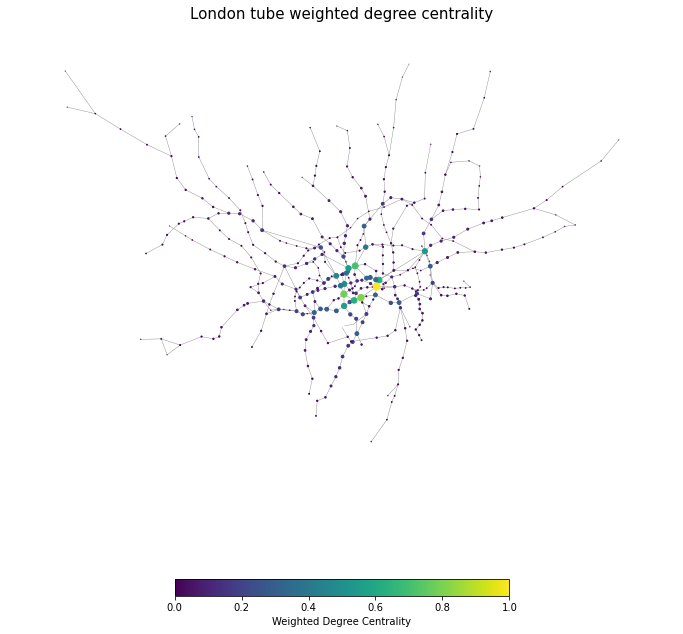

In [258]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Weighted Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted degree centrality",fontsize=15)
plt.show()

In [458]:
Gdegw=G.copy()
clus=[]
nodes=[]
edges=[]
av_deg=[]
rem=[]

for i in degwrank1:
    Gdegw=Gdegw.copy()
    Gdegw.remove_node(i)
    
    l1=list(G.nodes)
    len(l1)
    
    ldegw=list(Gdegw.nodes)
    len(ldegw)
    
    rem_nodes=list(set(l1) - set(ldegw))
    rem.append(rem_nodes)
    
    #computing the degree for each graph:
    degree_Gdegw=nx.degree(Gdegw)
    nx.set_node_attributes(Gdegw,dict(degree_Gdegw),'deg')
    Gdegw_deg=[(i[1]['deg']) for i in Gdegw.nodes(data=True)]
    
    # find the k and p(k):
    degree_valuesGdegw = sorted(set(Gdegw_deg)) # k
    probabilityGdegw = [list(Gdegw_deg).count(i)/float(nx.number_of_nodes(Gdegw)) for i in degree_valuesGdegw] #p(k)

    #Average clustering coefficient (C):
    clus_deg = nx.average_clustering(Gdegw)
    clus.append(clus_deg)
    
    #Number of nodes (N):
    nodes_deg= Gdegw.number_of_nodes() 
    nodes.append(nodes_deg)
    
    #Number of edges (L):
    edges_deg= Gdegw.number_of_edges()
    edges.append(edges_deg)
    
     #Average degree <k>:
    from statistics import mean
    av_deg_deg= mean(Gdegw_deg) 
    av_deg.append(av_deg_deg)
    
name=['deg1','deg2','deg3', 'deg4','deg5','deg6','deg7','deg8','deg9','deg10']
df_all = pd.DataFrame({'Networks':name,'N':nodes,'<k>':av_deg,'L':edges,'C':clus,'removed':rem})
df_all

NetworkXError: The node degree is not in the graph.

## 2. weighted betweenness centrality

### 2.1 weighted betweenness centrality on nodes

In [536]:
#Let us compute the betweenness centrality for the network, considering the distance between stations:

bet_london_w=nx.betweenness_centrality(G,weight='flows',normalized=True)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

In [538]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())

df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted_bet_w = df.sort_values(["betweenness_w"], ascending=False)
df_sorted_bet_w[0:10]

,betweenness_w
West Hampstead,0.400429
Gospel Oak,0.319461
Finchley Road & Frognal,0.309411
Hampstead Heath,0.308784
Willesden Junction,0.285517
Brondesbury,0.260520
Stratford,0.260006
Brondesbury Park,0.259060
Kensal Rise,0.257600
Kentish Town West,0.172616


In [383]:
df_sorted_bet_w.to_csv('bet_w.csv')

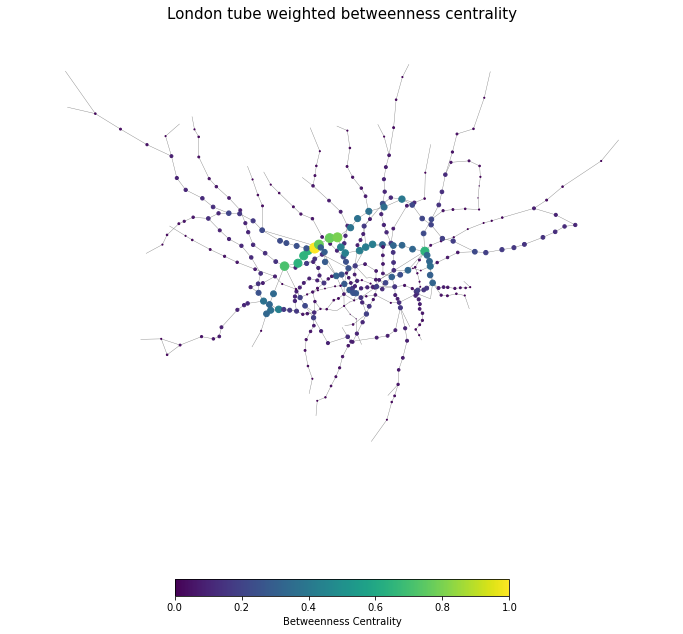

In [256]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos = nx.get_node_attributes(G, 'coords')


fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted betweenness centrality",fontsize=15)
plt.show()

In [460]:
lar_sp=nx.average_shortest_path_length(G)
lar_sp

13.545997506234414

In [527]:
#Average clustering coefficient (C):
clus_bet = nx.average_clustering(G,weight='flows',normalized = True)
clus_bet

TypeError: average_clustering() got an unexpected keyword argument 'normalized'

### 2.2 weighted betweenness centrality on edges

In [303]:
#Let us compute the betweenness centrality for the network, but this time lets do it in the edges!
bet_london_e=nx.edge_betweenness_centrality(G, normalized=False, weight='flows')
# We can add these values to the edges attributes:
nx.set_edge_attributes(G,bet_london_e,'betweenness_e')

In [304]:
df = pd.DataFrame(index=G.edges())


df['length'] = pd.Series(nx.get_edge_attributes(G, 'length'))
df['betweenness_e'] = pd.Series(nx.get_edge_attributes(G, 'betweenness_e'),dtype='float')

df_sorted = df.sort_values(["betweenness_e"], ascending=False)
df_sorted[0:10]

,,length,betweenness_e
West Hampstead,Finchley Road & Frognal,630.657530,24914.00
Finchley Road & Frognal,Hampstead Heath,1420.533148,24860.00
Hampstead Heath,Gospel Oak,938.560601,24814.00
Brondesbury,West Hampstead,849.231235,21043.75
Brondesbury Park,Brondesbury,742.188672,20927.25
Kensal Rise,Brondesbury Park,1002.535434,20810.75
Willesden Junction,Kensal Rise,1629.243795,20694.00
Gospel Oak,Kentish Town West,1091.159427,14040.75
Kentish Town West,Camden Road,898.244945,13903.75
Camden Road,Caledonian Road & Barnsbury,1764.578290,13768.50


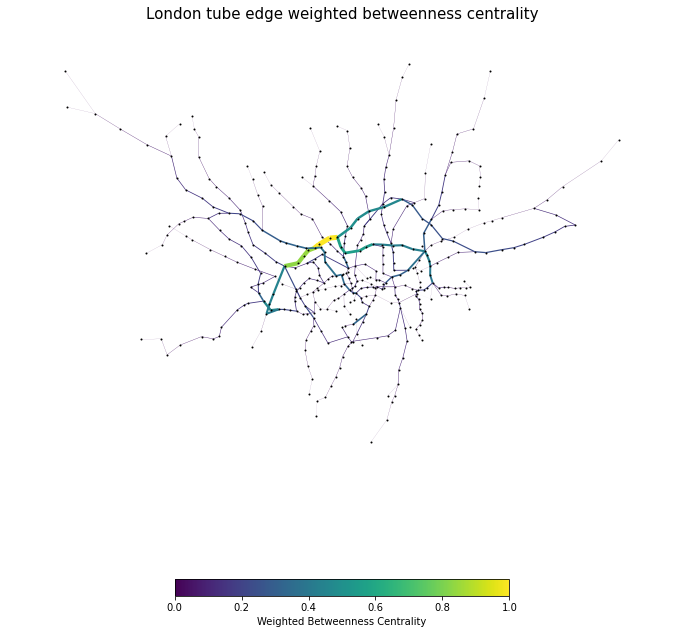

In [277]:
# Lets set color and width of edges according to betweenness values
betweenness_e_values=[(i[2]['betweenness_e']) for i in G.edges(data=True)]

bet_e_color=[(i[2]['betweenness_e']/max(betweenness_e_values)) for i in G.edges(data=True)]
bet_e_width=[(i[2]['betweenness_e']/max(betweenness_e_values)*5) for i in G.edges(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

#pos=nx.spring_layout(X)
edg=nx.draw_networkx_edges(G, pos,edge_color=bet_e_color, width=bet_e_width)

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Weighted Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube edge weighted betweenness centrality",fontsize=15)
plt.show()

### 2.3 A. Non-sequential removal

#### (1) average cluster coefficient of bet

In [515]:
df_sorted_bet_w = df.sort_values(["betweenness_w"], ascending=False).head(10)

In [516]:
betrank = df_sorted_bet_w.index.tolist()

In [517]:
betrank

['West Hampstead',
 'Gospel Oak',
 'Finchley Road & Frognal',
 'Hampstead Heath',
 'Willesden Junction',
 'Brondesbury',
 'Stratford',
 'Brondesbury Park',
 'Kensal Rise',
 'Kentish Town West']

In [518]:
Gbet=G.copy()
clus=[]
nodes=[]
edges=[]
av_deg=[]
rem=[]

for i in betrank:
    Gbet=Gbet.copy()
    Gbet.remove_node(i)
    
    l1=list(G.nodes)
    len(l1)
    
    lbet=list(Gbet.nodes)
    len(lbet)
    
    rem_nodes=list(set(l1) - set(lbet))
    rem.append(rem_nodes)
    
    #computing the degree for each graph:
    degree_Gbet=nx.degree(Gbet)
    nx.set_node_attributes(Gbet,dict(degree_Gbet),'deg')
    Gbet_deg=[(i[1]['deg']) for i in Gbet.nodes(data=True)]
    
    # find the k and p(k):
    degree_valuesGbet = sorted(set(Gbet_deg)) # k
    probabilityGbet = [list(Gbet_deg).count(i)/float(nx.number_of_nodes(Gbet)) for i in degree_valuesGbet] #p(k)

    #Average clustering coefficient (C):
    clus_bet = nx.average_clustering(Gbet,weight='flows')
    clus.append(clus_bet)
    
    #Number of nodes (N):
    nodes_bet= Gbet.number_of_nodes() 
    nodes.append(nodes_bet)
    
    #Number of edges (L):
    edges_bet= Gbet.number_of_edges()
    edges.append(edges_bet)
    
     #Average degree <k>:
    from statistics import mean
    av_deg_bet= mean(Gbet_deg) 
    av_deg.append(av_deg_bet)
    
name=['bet1','bet2','bet3', 'bet4','bet5','bet6','bet7','bet8','bet9','bet10']
df_all = pd.DataFrame({'Networks':name,'N':nodes,'<k>':av_deg,'L':edges,'C':clus,'removed':rem})
df_all

,Networks,N,<k>,L,C,removed
0,bet1,400,2.315000,463,0.001393,[West Hampstead]
1,bet2,399,2.305764,460,0.001397,"[Gospel Oak, West Hampstead]"
2,bet3,398,2.306533,459,0.001400,"[Gospel Oak, West Hampstead, Finchley Road & F..."
3,bet4,397,2.312343,459,0.001404,"[Gospel Oak, West Hampstead, Hampstead Heath, ..."
4,bet5,396,2.292929,454,0.001407,"[West Hampstead, Hampstead Heath, Willesden Ju..."
5,bet6,395,2.293671,453,0.001411,"[West Hampstead, Hampstead Heath, Brondesbury,..."
6,bet7,394,2.253807,444,0.001443,"[West Hampstead, Hampstead Heath, Brondesbury,..."
7,bet8,393,2.254453,443,0.001447,"[Brondesbury Park, West Hampstead, Hampstead H..."
8,bet9,392,2.260204,443,0.001450,"[Brondesbury Park, West Hampstead, Hampstead H..."
9,bet10,391,2.260870,442,0.001454,"[Brondesbury Park, Hampstead Heath, West Hamps..."


In [519]:
df_all.to_csv('bet_w_imp_A_coe.csv')

#### (2) the largest component and average shortest path

In [509]:
Gbet=G.copy()
conne=[]
comp=[]
size=[]
largest_size=[]
lar_sp_length=[]
dia=[]
rem=[]

for i in betrank:
    Gbet=Gbet.copy()
    Gbet.remove_node(i)
    
    l1=list(G.nodes)
    len(l1)
    
    lbet=list(Gbet.nodes)
    len(lbet)
    
    rem_nodes=list(set(l1) - set(lbet))
    rem.append(rem_nodes)
    
    # Has the graph one component?
    conne_bet=nx.is_connected(Gbet)
    conne.append(conne_bet)
    
    # number of connected components
    comp_bet=nx.number_connected_components(Gbet)
    comp.append(comp_bet)
    
    # To comput the size ( number of node) of each component
    Subg = [Gbet.subgraph(c).copy() for c in nx.connected_components(Gbet)]
    Subg_bet=[len(subgraph.nodes) for subgraph in Subg]
    size.append(Subg_bet)
    
    
    # To obtain the largest component as a new graph: 
    # Get the list of components:
    components = nx.connected_components(Gbet)
    # Use the max() command to find the largest one:
    largest_component = max(components, key=len)
    
    # Create a "subgraph" of the largest component
    Largest_subgraph = (Gbet.subgraph(largest_component)).number_of_nodes()
    largest_size.append(Largest_subgraph)
    
    Largest_subgraph1 = Gbet.subgraph(largest_component)
    diameter = nx.diameter(Largest_subgraph1)
    dia.append(diameter)
    
    #compute the average shortest path length for the largest component
    lar_sp=nx.average_shortest_path_length(Largest_subgraph1)
    lar_sp_length.append(lar_sp)
     
    
name=['bet1','bet2','bet3', 'bet4','bet5','bet6','bet7','bet8','bet9','bet10']
df_all = pd.DataFrame({'Networks':name,'connectivity':conne,'components':comp,'size':size,'largest_size':largest_size,
                       'average_shortest_path':lar_sp_length,'diameter':dia,'removed':rem})
df_all  

,Networks,connectivity,components,size,largest_size,average_shortest_path,diameter,removed
0,bet1,True,1,[400],400,13.710764,36,[West Hampstead]
1,bet2,False,2,"[397, 2]",397,13.718902,36,"[Gospel Oak, West Hampstead]"
2,bet3,False,2,"[397, 1]",397,13.718902,36,"[Gospel Oak, West Hampstead, Finchley Road & F..."
3,bet4,True,1,[397],397,13.718902,36,"[Gospel Oak, West Hampstead, Hampstead Heath, ..."
4,bet5,False,3,"[380, 13, 3]",380,13.565935,36,"[West Hampstead, Hampstead Heath, Willesden Ju..."
5,bet6,False,3,"[380, 13, 2]",380,13.565935,36,"[West Hampstead, Hampstead Heath, Brondesbury,..."
6,bet7,False,5,"[358, 13, 1, 20, 2]",358,14.618829,49,"[West Hampstead, Hampstead Heath, Brondesbury,..."
7,bet8,False,5,"[358, 13, 1, 20, 1]",358,14.618829,49,"[Brondesbury Park, West Hampstead, Hampstead H..."
8,bet9,False,4,"[358, 13, 1, 20]",358,14.618829,49,"[Brondesbury Park, West Hampstead, Hampstead H..."
9,bet10,False,4,"[357, 13, 1, 20]",357,14.626900,49,"[Brondesbury Park, Hampstead Heath, West Hamps..."


In [393]:
df_all.to_csv('bet_w_imp_A_lar.csv')

### 2.3 B. sequential removal

In [520]:
GbetB=G.copy()
#  We can calculate the degree centrality using networkx function:
bet_london_t =nx.betweenness_centrality(GbetB, normalized=False, weight='flows')
betweenness=nx.set_node_attributes(GbetB,bet_london_t,'betweenness_t')
    

# To dataframe using the nodes as the index
df = pd.DataFrame(index=GbetB.nodes())

df['betweenness_t'] = pd.Series(nx.get_node_attributes(GbetB, 'betweenness_t'), dtype='float')

# find the top 1 node
df_sorted_bet = df.sort_values(["betweenness_t"], ascending=False).head(1)
bettop1w = df_sorted_bet.index.tolist()

In [521]:
bettop1w

['West Hampstead']

In [522]:
GbetB=G.copy()
bettop1wlist=[]
betweenness=[]
clus=[]
nodes=[]
edges=[]
av_deg=[]
conne=[]
comp=[]
size=[]
largest_size=[]
lar_sp_length=[]
dia=[]
for x in range(10): 
    for i in bettop1w:
        GbetB.remove_node(i)
        GbetB=GbetB.copy()
        
         #computing the degree for each graph:
        degree_GbetB=nx.degree(GbetB)
        nx.set_node_attributes(GbetB,dict(degree_GbetB),'deg')
        GbetB_deg=[(i[1]['deg']) for i in GbetB.nodes(data=True)]
    
    # find the k and p(k):
        degree_valuesGbetB = sorted(set(GbetB_deg)) # k
        probabilityGbetB = [list(GbetB_deg).count(i)/float(nx.number_of_nodes(GbetB)) for i in degree_valuesGbetB] #p(k)

    #Average clustering coefficient (C):
        clus_bet = nx.average_clustering(GbetB,weight='flows')
        clus.append(clus_bet)
    
    #Number of nodes (N):
        nodes_bet= GbetB.number_of_nodes() 
        nodes.append(nodes_bet)
    
    #Number of edges (L):
        edges_bet= GbetB.number_of_edges()
        edges.append(edges_bet)
    
     #Average degree <k>:
        from statistics import mean
        av_deg_bet= mean(GbetB_deg) 
        av_deg.append(av_deg_bet)
        
        # Has the graph one component?
        conne_bet=nx.is_connected(GbetB)
        conne.append(conne_bet)
    
        # number of connected components
        comp_bet=nx.number_connected_components(GbetB)
        comp.append(comp_bet)
    
        # To comput the size ( number of node) of each component
        Subg = [GbetB.subgraph(c).copy() for c in nx.connected_components(GbetB)]
        Subg_bet=[len(subgraph.nodes) for subgraph in Subg]
        size.append(Subg_bet)
    
    
        # To obtain the largest component as a new graph: 
        # Get the list of components:
        components = nx.connected_components(GbetB)
        # Use the max() command to find the largest one:
        largest_component = max(components, key=len)
        # Create a "subgraph" of the largest component
        Largest_subgraph = (GbetB.subgraph(largest_component)).number_of_nodes()
        largest_size.append(Largest_subgraph)
    
        Largest_subgraph1 = GbetB.subgraph(largest_component)
        diameter = nx.diameter(Largest_subgraph1)
        dia.append(diameter)
        
        #compute the average shortest path length for the largest component
        lar_sp=nx.average_shortest_path_length(Largest_subgraph1)
        lar_sp_length.append(lar_sp)
        
        
                
    #  We can calculate the degree centrality using networkx function:
        bet_london_t =nx.betweenness_centrality(GbetB, normalized=False)
        betweenness=nx.set_node_attributes(GbetB,bet_london_t,'betweenness_t')
    

     # To dataframe using the nodes as the index
        df = pd.DataFrame(index=GbetB.nodes())
        df['station_name'] = pd.Series(nx.get_node_attributes(GbetB, 'station_name'))
        df['betweenness_t'] = pd.Series(nx.get_node_attributes(GbetB, 'betweenness_t'), dtype='float')

        # find the top 1 node
        df_sorted_bet = df.sort_values(["betweenness_t"], ascending=False).head(1)
        bettop1w = df_sorted_bet.index.tolist()
        bettop1wlist.append(bettop1w)   
    
   
    


    
name=['bet1','bet2','bet3', 'bet4','bet5','bet6','bet7','bet8','bet9','bet10']
df_all = pd.DataFrame({'Networks':name,'N':nodes,'<k>':av_deg,'L':edges,'C':clus,
                       'connectivity':conne,'components':comp,'size':size,'largest_size':largest_size,
                       'average_shortest_path':lar_sp_length,'diameter':dia,'newbettop1':bettop1wlist})
df_all

/tmp/ipykernel_4362/3041724528.py:85: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['station_name'] = pd.Series(nx.get_node_attributes(GbetB, 'station_name'))


,Networks,N,<k>,L,C,connectivity,components,size,largest_size,average_shortest_path,diameter,newbettop1
0,bet1,400,2.315000,463,0.001393,True,1,[400],400,13.710764,36,[Stratford]
1,bet2,399,2.275689,454,0.001425,False,3,"[378, 1, 20]",378,14.682441,49,[King's Cross St. Pancras]
2,bet3,398,2.246231,447,0.001432,False,3,"[377, 1, 20]",377,16.084471,50,[Waterloo]
3,bet4,397,2.221662,441,0.002184,False,3,"[376, 1, 20]",376,16.837943,50,[Bank and Monument]
4,bet5,396,2.191919,434,0.001928,False,3,"[375, 1, 20]",375,18.924663,52,[Canada Water]
5,bet6,395,2.177215,430,0.001933,False,4,"[147, 227, 1, 20]",227,13.462360,38,[Earl's Court]
6,bet7,394,2.152284,424,0.001310,False,4,"[147, 226, 1, 20]",226,14.206450,39,[Shepherd's Bush]
7,bet8,393,2.137405,420,0.001314,False,5,"[147, 196, 1, 20, 29]",196,13.792046,37,[Euston]
8,bet9,392,2.122449,416,0.001169,False,6,"[147, 173, 1, 20, 22, 29]",173,13.821885,38,[Baker Street]
9,bet10,391,2.092072,409,0.001139,False,7,"[147, 170, 2, 1, 20, 22, 29]",170,18.193596,48,[Acton Town]


In [523]:
df_all.to_csv('bet_w_imp_B.csv')

In [533]:
GbetB=G.copy()

betweenness=[]
clus=[]
nodes=[]
edges=[]
av_deg=[]
conne=[]
comp=[]
size=[]
largest_size=[]
lar_sp_length=[]
dia=[]

        
         #computing the degree for each graph:
degree_GbetB=nx.degree(GbetB)
nx.set_node_attributes(GbetB,dict(degree_GbetB),'deg')
GbetB_deg=[(i[1]['deg']) for i in GbetB.nodes(data=True)]
    
    # find the k and p(k):
degree_valuesGbetB = sorted(set(GbetB_deg)) # k
probabilityGbetB = [list(GbetB_deg).count(i)/float(nx.number_of_nodes(GbetB)) for i in degree_valuesGbetB] #p(k)

    #Average clustering coefficient (C):
clus_bet = nx.average_clustering(GbetB,weight='flows')
clus.append(clus_bet)
    
    #Number of nodes (N):
nodes_bet= GbetB.number_of_nodes() 
nodes.append(nodes_bet)
    
    #Number of edges (L):
edges_bet= GbetB.number_of_edges()
edges.append(edges_bet)
    
     #Average degree <k>:
from statistics import mean
av_deg_bet= mean(GbetB_deg) 
av_deg.append(av_deg_bet)
        
        # Has the graph one component?
conne_bet=nx.is_connected(GbetB)
conne.append(conne_bet)
    
        # number of connected components
comp_bet=nx.number_connected_components(GbetB)
comp.append(comp_bet)
    
        # To comput the size ( number of node) of each component
Subg = [GbetB.subgraph(c).copy() for c in nx.connected_components(GbetB)]
Subg_bet=[len(subgraph.nodes) for subgraph in Subg]
size.append(Subg_bet)
    
    
        # To obtain the largest component as a new graph: 
        # Get the list of components:
components = nx.connected_components(GbetB)
        # Use the max() command to find the largest one:
largest_component = max(components, key=len)
        # Create a "subgraph" of the largest component
Largest_subgraph = (GbetB.subgraph(largest_component)).number_of_nodes()
largest_size.append(Largest_subgraph)
    
Largest_subgraph1 = GbetB.subgraph(largest_component)
diameter = nx.diameter(Largest_subgraph1)
dia.append(diameter)
        
        #compute the average shortest path length for the largest component
lar_sp=nx.average_shortest_path_length(Largest_subgraph1)
lar_sp_length.append(lar_sp)

   
    


    
name=['bet0']
df_all = pd.DataFrame({'Networks':name,'N':nodes,'<k>':av_deg,'L':edges,'C':clus,
                       'connectivity':conne,'components':comp,'size':size,'largest_size':largest_size,
                       'average_shortest_path':lar_sp_length,'diameter':dia})
df_all

,Networks,N,<k>,L,C,connectivity,components,size,largest_size,average_shortest_path,diameter
0,bet0,401,2.329177,467,0.00139,True,1,[401],401,13.545998,36
